# Importamos librerias estandar para el uso de python

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Importamos la base de datos

### 1. Los datos son leídos como archivo Excel, ya que en su estructura contienen información que no permite hacer una conversión a csv, un formato más manejable, por ende debemos primero realizar la calidad de los datos.

### 2. Comenzamos leyendo el archivo desde fila 1
### 3. Limpiamos los nombres de las columnas para hacerlo más legible y mantener buenas prácticas en la programación
### 4. Enviamos todas las variables tipo 'Texto' a minúsculas

In [55]:
df = pd.read_excel('F:\\Trabajo_Linktic_2023\\5.1. Rutas de atención-20230614T012351Z-001\\5.1. Rutas de atención\\Población_2022_v2.xlsx', sheet_name='Población_2022_' , header = 1)
# libreria janitor nos permite limpiar variables de forma masiva
from janitor import clean_names, remove_empty
df = (
    pd.DataFrame.from_dict(df)
    .pipe(clean_names)
    .pipe(remove_empty))
# Convertir todas las variables de texto a minúsculas
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

,n°,id_calificacion_pcl,id_calificacion_dto,numero_dictamen,id_tipo_doc,id_persona,claudia,id_siniestro,ubicacion_revision_manual,departamento_aranda_dx,...,reserva_actualziada,esfera_mental,fase_rhb,cierre_masivo_,observaciones_,alerta,liberar_reserva_,proveedor,ruta_,grupo_segun_prestaciones_
0,8065,11869905.0,1437289.0,912418.0,cc,1110531153,NaN,176742207,NaN,tolima,...,550911309.0,trastorno adaptativo con sintomas mixtos,NaN,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
1,15641,11798298.0,18912434.0,1841041.0,cc,7335383,NaN,342476028,NaN,bogota d.c.,...,549818619.0,NaN,NaN,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
2,7374,11876870.0,1272802.0,793253.0,cc,1049609341,NaN,146658403,NaN,boyaca,...,545572867.0,trastorno adaptativo con animo triste,NaN,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
3,16441,11552580.0,18957126.0,1888476.0,cc,1061767979,NaN,352525068,NaN,bogota d.c.,...,478911698.0,trastorno depresivo mayor,NaN,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
4,15395,11927345.0,18984725.0,13504687.0,cc,13504687,NaN,337460969,NaN,norte de santander,...,463982998.0,NaN,NaN,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170659,107950,11995688.0,19489666.0,2412543.0,cc,1143402101,NaN,412985029,NaN,bogota d.c.,...,0.0,NaN,cerrada,NaN,"sin prestaciones posteriores a su pcl, sin res...",NaN,NaN,NaN,control,no prestaciones
170660,48212,11916282.0,19378187.0,2329807.0,cc,71171512,NaN,392926924,NaN,bogota d.c.,...,25971.0,NaN,seguimiento,NaN,siniestro con prestaciones asistenciales sin i...,NaN,NaN,NaN,7 crónicos con pcl definida sin incapacidad y...,en manejo asistencial
170661,45403,11997179.0,19371676.0,2314191.0,cc,32103522,NaN,392920856,NaN,bogota d.c.,...,0.0,NaN,NaN,NaN,"sin prestaciones posteriores a su pcl, sin res...",NaN,NaN,NaN,control,no prestaciones
170662,79124,11885699.0,19449503.0,2366393.0,cc,79733753,NaN,392972240,NaN,huila,...,0.0,NaN,NaN,NaN,"sin prestaciones posteriores a su pcl, sin res...",NaN,NaN,NaN,control,no prestaciones


## Visión del panel analítico para comprender toda la información

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170664 entries, 0 to 170663
Data columns (total 65 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   n°                                      170664 non-null  int64         
 1   id_calificacion_pcl                     151126 non-null  float64       
 2   id_calificacion_dto                     170402 non-null  float64       
 3   numero_dictamen                         170402 non-null  float64       
 4   id_tipo_doc                             170664 non-null  object        
 5   id_persona                              170664 non-null  object        
 6   claudia                                 140 non-null     float64       
 7   id_siniestro                            170664 non-null  int64         
 8   ubicacion_revision_manual               43 non-null      object        
 9   departamento_aranda_dx               

In [57]:
# Este código está diseñado para limpiar y preprocesar el texto en un DataFrame de pandas. Vamos a descomponerlo paso por paso
# from unidecode import unidecode: Esto importa la función unidecode del módulo unidecode.
# Esta función se utiliza para eliminar los acentos y otros diacríticos de un string
from unidecode import unidecode
def limpiar_texto(df):
    for columna in df.select_dtypes(include=[object]):
        df[columna] = df[columna].apply(lambda fila: unidecode(str(fila)).lower())
    return df
df_limpiado = limpiar_texto(df)


# Exportación de un panel analítico tipo html para su exploración 

In [58]:
'''# Crear el informe
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report V2")

# Guardar el informe como HTML
profile.to_file("reporte.html")'''

'# Crear el informe\nfrom pandas_profiling import ProfileReport\nprofile = ProfileReport(df, title="Pandas Profiling Report V2")\n\n# Guardar el informe como HTML\nprofile.to_file("reporte.html")'

## Creacion de df_control, datos que contienen solo los registros con 'control' dentro de ella.
## Eliminación de control en la variable ruta_ de los datos originales.

In [59]:
# Crear una copia del DataFrame original
df_control = df.copy()
# Eliminar las filas con 'control' en la columna 'ruta_' del DataFrame original
df = df[~df['ruta_'].str.contains('control')]
# Restablecer los índices en el DataFrame original
df.reset_index(drop=True, inplace=True)
# Ahora df es el DataFrame sin las filas que contienen 'control' en la columna 'ruta_', y df_copy conserva todas las filas originales.
df

,n°,id_calificacion_pcl,id_calificacion_dto,numero_dictamen,id_tipo_doc,id_persona,claudia,id_siniestro,ubicacion_revision_manual,departamento_aranda_dx,...,reserva_actualziada,esfera_mental,fase_rhb,cierre_masivo_,observaciones_,alerta,liberar_reserva_,proveedor,ruta_,grupo_segun_prestaciones_
0,8065,11869905.0,1437289.0,912418.0,cc,1110531153,NaN,176742207,nan,tolima,...,550911309.0,trastorno adaptativo con sintomas mixtos,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
1,15641,11798298.0,18912434.0,1841041.0,cc,7335383,NaN,342476028,nan,bogota d.c.,...,549818619.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
2,7374,11876870.0,1272802.0,793253.0,cc,1049609341,NaN,146658403,nan,boyaca,...,545572867.0,trastorno adaptativo con animo triste,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
3,16441,11552580.0,18957126.0,1888476.0,cc,1061767979,NaN,352525068,nan,bogota d.c.,...,478911698.0,trastorno depresivo mayor,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
4,15395,11927345.0,18984725.0,13504687.0,cc,13504687,NaN,337460969,nan,norte de santander,...,463982998.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26203,32826,11931282.0,19308955.0,2253913.0,cc,1035437051,NaN,387863613,nan,antioquia,...,380241.0,nan,seguimiento,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
26204,138167,NaN,19531081.0,2471461.0,cc,71022883,NaN,423028091,nan,antioquia,...,0.0,nan,seguimiento,NaN,validar cierre de rhb segun tiempo del siniest...,supera tiempo de rhb,nan,nan,"1, agudos sin pcl sin incapacidad mayor o igu...",en manejo asistencial
26205,143663,NaN,19538650.0,2463410.0,cc,42978306,NaN,423035285,nan,antioquia,...,0.0,nan,cerrada,NaN,con cierre de rhb pasar a pcl para liberar res...,pendiente pcl,nan,nan,"1, agudos sin pcl sin incapacidad mayor o igu...",en manejo asistencial
26206,48212,11916282.0,19378187.0,2329807.0,cc,71171512,NaN,392926924,nan,bogota d.c.,...,25971.0,nan,seguimiento,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial


In [60]:
# Conservar solo las filas con 'control' en la columna 'ruta_' en df_copy
df_control = df_control[df_control['ruta_'].str.contains('control')]

# Restablecer los índices en df_copy
df_control.reset_index(drop=True, inplace=True)
df_control

,n°,id_calificacion_pcl,id_calificacion_dto,numero_dictamen,id_tipo_doc,id_persona,claudia,id_siniestro,ubicacion_revision_manual,departamento_aranda_dx,...,reserva_actualziada,esfera_mental,fase_rhb,cierre_masivo_,observaciones_,alerta,liberar_reserva_,proveedor,ruta_,grupo_segun_prestaciones_
0,15113,11260625.0,19086790.0,7.629568e+07,cc,76295684,NaN,317442738,nan,valle del cauca,...,396229437.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,control,sin autorizaciones ultimo 6 meses
1,17579,11600872.0,19021161.0,1.950793e+06,cc,19422722,NaN,357585574,nan,bogota d.c.,...,351842680.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,"sin prestaciones asistenciales desde el 2021, ...",definir,nan,control,sin autorizaciones ultimo 6 meses
2,11146,11574754.0,18971905.0,1.073321e+09,cc,1073321252,NaN,242129867,nan,caldas,...,263833520.9,nan,nan,NaN,siniestro sin prestaciones posteriores a su pcl,venviar a la dra laura,si,nan,control,no prestaciones
3,127,11388884.0,3526.0,3.477000e+03,cc,3198543,NaN,25011761,nan,bogota d.c.,...,236297758.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,control,sin autorizaciones ultimo 6 meses
4,18712,11523427.0,19070084.0,1.998596e+06,pe,944770222081990,NaN,372634031,nan,cundinamarca,...,203648228.0,"trastorno de adaptacion, reaccion de ajuste, ...",nan,NaN,siniestro sin prestaciones posteriores a su pcl,validar facturacion usuario sin prestaciones p...,nan,nan,control,no prestaciones
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144451,103676,11998811.0,19580480.0,3.202300e+09,cc,23496007,NaN,412979354,nan,bogota d.c.,...,196500.0,nan,cerrada,NaN,"sin prestaciones posteriores a su pcl, sin res...",nan,nan,nan,control,no prestaciones
144452,131494,11993676.0,19522028.0,2.446426e+06,cc,1022371113,NaN,423019393,nan,bogota d.c.,...,0.0,nan,seguimiento,NaN,"sin prestaciones posteriores a su pcl, sin res...",nan,nan,nan,control,no prestaciones
144453,107950,11995688.0,19489666.0,2.412543e+06,cc,1143402101,NaN,412985029,nan,bogota d.c.,...,0.0,nan,cerrada,NaN,"sin prestaciones posteriores a su pcl, sin res...",nan,nan,nan,control,no prestaciones
144454,45403,11997179.0,19371676.0,2.314191e+06,cc,32103522,NaN,392920856,nan,bogota d.c.,...,0.0,nan,nan,NaN,"sin prestaciones posteriores a su pcl, sin res...",nan,nan,nan,control,no prestaciones


In [62]:
# comprobacion
df['ruta_'].value_counts()

7 cronicos con pcl definida  sin incapacidad y mantenimiento funcional                             17142
2. casos  en rehabilitacion integral                                                                4975
1, agudos sin pcl  sin incapacidad mayor o igual 15 dias                                            2820
5, casos con pcl definida, con incapacidad y prestaciones  asistenciales con rol laboral activo      739
6, casos con pcl definida  con incapacidad y prestaciones  asistenciales desvinculados               356
nan                                                                                                  176
Name: ruta_, dtype: int64

In [63]:
# comprobacion
df_control['ruta_'].value_counts()

control     138257
control       6199
Name: ruta_, dtype: int64

In [65]:
# eliminacion de los nulos de la base de datos original.
df = df[~df['ruta_'].str.contains('nan')]
# Restablecer los índices en el DataFrame resultante
df.reset_index(drop=True, inplace=True)
df

,n°,id_calificacion_pcl,id_calificacion_dto,numero_dictamen,id_tipo_doc,id_persona,claudia,id_siniestro,ubicacion_revision_manual,departamento_aranda_dx,...,reserva_actualziada,esfera_mental,fase_rhb,cierre_masivo_,observaciones_,alerta,liberar_reserva_,proveedor,ruta_,grupo_segun_prestaciones_
0,8065,11869905.0,1437289.0,912418.0,cc,1110531153,NaN,176742207,nan,tolima,...,550911309.0,trastorno adaptativo con sintomas mixtos,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
1,15641,11798298.0,18912434.0,1841041.0,cc,7335383,NaN,342476028,nan,bogota d.c.,...,549818619.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
2,7374,11876870.0,1272802.0,793253.0,cc,1049609341,NaN,146658403,nan,boyaca,...,545572867.0,trastorno adaptativo con animo triste,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
3,16441,11552580.0,18957126.0,1888476.0,cc,1061767979,NaN,352525068,nan,bogota d.c.,...,478911698.0,trastorno depresivo mayor,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
4,15395,11927345.0,18984725.0,13504687.0,cc,13504687,NaN,337460969,nan,norte de santander,...,463982998.0,nan,nan,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26027,32826,11931282.0,19308955.0,2253913.0,cc,1035437051,NaN,387863613,nan,antioquia,...,380241.0,nan,seguimiento,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial
26028,138167,NaN,19531081.0,2471461.0,cc,71022883,NaN,423028091,nan,antioquia,...,0.0,nan,seguimiento,NaN,validar cierre de rhb segun tiempo del siniest...,supera tiempo de rhb,nan,nan,"1, agudos sin pcl sin incapacidad mayor o igu...",en manejo asistencial
26029,143663,NaN,19538650.0,2463410.0,cc,42978306,NaN,423035285,nan,antioquia,...,0.0,nan,cerrada,NaN,con cierre de rhb pasar a pcl para liberar res...,pendiente pcl,nan,nan,"1, agudos sin pcl sin incapacidad mayor o igu...",en manejo asistencial
26030,48212,11916282.0,19378187.0,2329807.0,cc,71171512,NaN,392926924,nan,bogota d.c.,...,25971.0,nan,seguimiento,NaN,siniestro con prestaciones asistenciales sin i...,nan,nan,nan,7 cronicos con pcl definida sin incapacidad y...,en manejo asistencial


In [67]:
print(df.shape)
print(df_control.shape)

(26032, 65)
(144456, 65)


---------------

# Creacion de algoritmo tipo clasificacion 'Random Forest'

In [69]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Preparar los datos
features = ['id_calificacion_pcl', 'id_calificacion_dto', 'numero_dictamen', 
            'id_empresa', 'soat', 'tipo', 'origen', 'porce_total', 
            'valor_2022_pa', 'dias_it_real_2022', 'suma_dias_it_h', 'cant_fac', 
            'valor_neto_cm_rad_', 'numero_de_siniestros_', 'estado_emp', 
            'usuario_activo', 'ultima_clasificacion_', 'platino', 
            'reservas_asistencial']

# definimos a Ruta como la variable objetivo
target = 'ruta_'


In [71]:
# Crear una copia del dataframe para no modificar el original
df_copy = df.copy()

# Rellenar los valores nulos en las columnas
for column in features:
    if df_copy[column].dtype == 'object':
        df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
    else:
        df_copy[column].fillna(df_copy[column].mean(), inplace=True)


In [72]:
# Codificar las variables categóricas
le = LabelEncoder()
for column in features:
    if df_copy[column].dtype == 'object':
        df_copy[column] = le.fit_transform(df_copy[column])

# 80% entrenamiento y 20% en comprobación

In [73]:
# Separar los datos en características (X) y objetivo (y)
X = df_copy[features]
y = df_copy[target]

# Crear los conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos y hacemos las predicciones

In [74]:
# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred, zero_division=0))

                                                                                                 precision    recall  f1-score   support

                                      1, agudos sin pcl  sin incapacidad mayor o igual 15 dias        0.97      0.93      0.95       572
                                                          2. casos  en rehabilitacion integral        0.96      0.99      0.97       993
5, casos con pcl definida, con incapacidad y prestaciones  asistenciales con rol laboral activo       0.65      0.28      0.40       158
         6, casos con pcl definida  con incapacidad y prestaciones  asistenciales desvinculados       0.75      0.09      0.16        98
                         7 cronicos con pcl definida  sin incapacidad y mantenimiento funcional       0.94      0.99      0.97      3386

                                                                                       accuracy                           0.95      5207
                                       

*Nota* = Los datos cambian con cada nueva ejecucuion del codigo.

1. El modelo que he desarrollado es capaz de predecir correctamente la 'ruta_' de los casos el 93% de las veces (esto es lo que llamamos 'exactitud' o 'accuracy').

2. Las otras medidas (precisión, recall y f1-score) nos dan más detalles sobre cómo se comporta nuestro modelo para cada categoría de la variable 'ruta_'. Aquí es lo que significa cada una de ellas:

- Precisión (Precision): Esta métrica nos dice cuántos de los casos que el modelo predijo en cada categoría son realmente correctos. Por ejemplo, para la categoría 'agudos sin pcl sin incapacidad mayor o igual 15 días', nuestro modelo tiene una precisión del 94%. Esto significa que de todas las predicciones que el modelo hizo en esta categoría, el 94% de ellas son correctas.

- Recall: Esta métrica nos dice cuántos de los casos reales en cada categoría el modelo pudo capturar. Por ejemplo, para la categoría 'agudos sin pcl sin incapacidad mayor o igual 15 días', nuestro modelo tiene un recall del 93%. Esto significa que el modelo pudo identificar correctamente el 93% de los casos reales en esta categoría.

- F1-Score: Esta es una medida que combina precisión y recall en un solo número. Es útil cuando quieres tener un equilibrio entre precisión y recall. Para la categoría 'agudos sin pcl sin incapacidad mayor o igual 15 días', nuestro modelo tiene un f1-score del 94%.

Además, el informe muestra el promedio ponderado (weighted avg) de precisión, recall y f1-score, considerando el número de casos reales en cada categoría.

Estas métricas son útiles para entender cómo se comporta nuestro modelo.

# Generamos la matriz de confusión

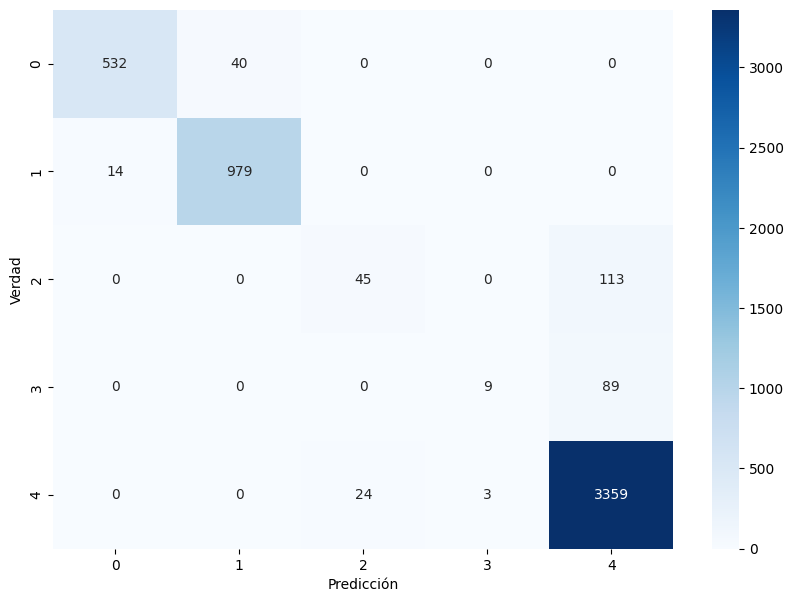

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = rf.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

## Área bajo la curva (AUC)
#### El AUC es el área bajo la curva ROC. Este puntaje nos da una buena idea de qué tan bien funciona el modelo.

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

auc = multiclass_roc_auc_score(y_test, y_pred)
print('AUC es de: ', auc)



AUC es de:  0.8155862747609962


## La curva ROC (característica de funcionamiento del receptor)

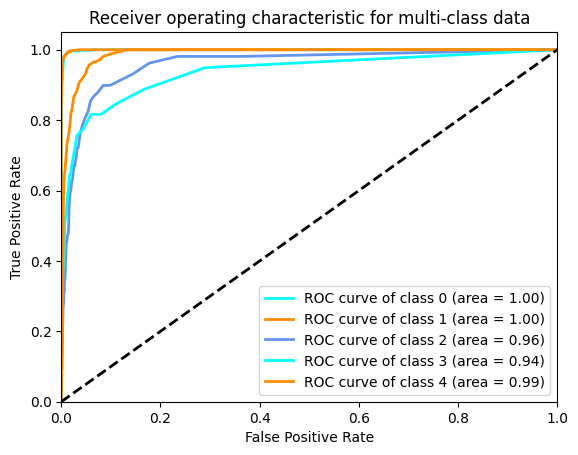

In [21]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = rf.predict_proba(X_test)

# Calculate ROC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

 Como resultado final generamos una grafico con las principales variables o las que más influyen a la hora de determinar una ruta 

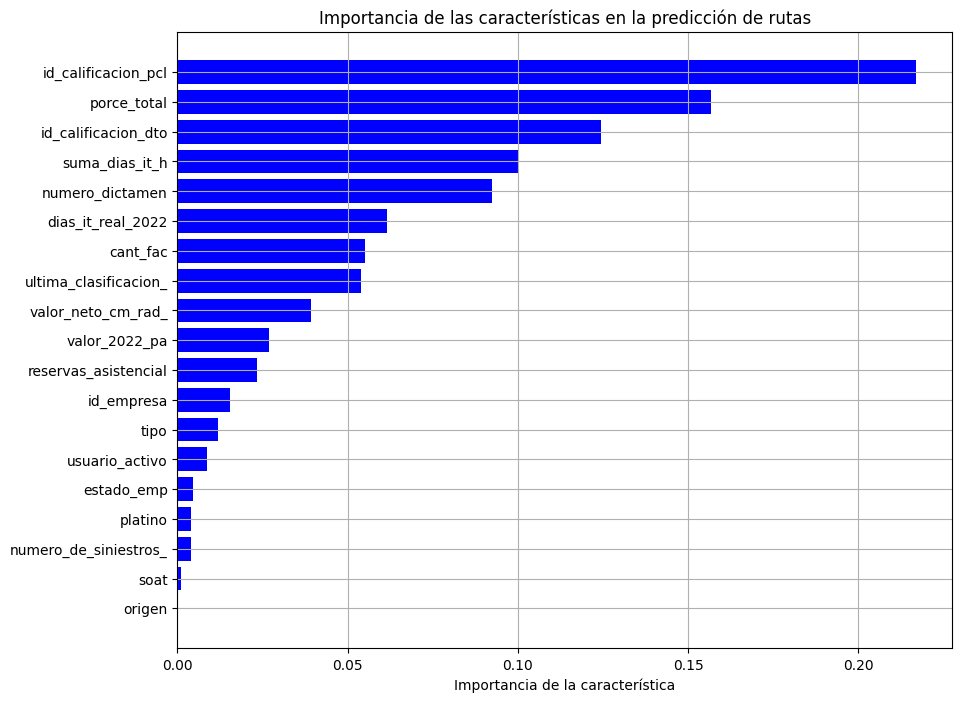

In [78]:
# Obteniendo importancia de las características
importances = rf.feature_importances_

# Creando un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Creando un gráfico de barras
plt.figure(figsize=(10,8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='blue', align='center')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de rutas')
plt.grid(True)
plt.show()


Visualización de la variable más importante

In [79]:
df['id_calificacion_pcl']

0        11869905.0
1        11798298.0
2        11876870.0
3        11552580.0
4        11927345.0
            ...    
26027    11931282.0
26028           NaN
26029           NaN
26030    11916282.0
26031    10022741.0
Name: id_calificacion_pcl, Length: 26032, dtype: float64

In [90]:
from sklearn.preprocessing import LabelEncoder

# Crear un diccionario para almacenar los codificadores para cada característica
encoders = {}

# Preparar los datos
df_copy = df.copy()

# Llenar los valores nulos y codificar las características categóricas
for column in features:
    if df_copy[column].dtype == 'object':
        df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
        le = LabelEncoder()
        df_copy[column] = le.fit_transform(df_copy[column])
        encoders[column] = le
    else:
        df_copy[column].fillna(df_copy[column].mean(), inplace=True)

# Definir las características y el objetivoP
X = df_copy[features]
y = df_copy[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))



                                                                                                 precision    recall  f1-score   support

                                      1, agudos sin pcl  sin incapacidad mayor o igual 15 dias        0.95      0.94      0.95       572
                                                          2. casos  en rehabilitacion integral        0.97      0.97      0.97       993
5, casos con pcl definida, con incapacidad y prestaciones  asistenciales con rol laboral activo       0.71      0.16      0.26       158
         6, casos con pcl definida  con incapacidad y prestaciones  asistenciales desvinculados       1.00      0.03      0.06        98
                         7 cronicos con pcl definida  sin incapacidad y mantenimiento funcional       0.94      1.00      0.97      3386

                                                                                       accuracy                           0.94      5207
                                       

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Crear diccionario para guardar los LabelEncoders
encoders = {}

# Definir la función safe_transform
def safe_transform(le, df, column_name):
    mask = df[column_name].isin(le.classes_)
    df.loc[~mask, column_name] = '<desconocido>'
    return le.transform(df[column_name])

# Preparar los datos
features = ['id_calificacion_pcl', 'id_calificacion_dto', 'numero_dictamen', 
            'id_empresa', 'soat', 'tipo', 'origen', 'porce_total', 
            'valor_2022_pa', 'dias_it_real_2022', 'suma_dias_it_h', 'cant_fac', 
            'valor_neto_cm_rad_', 'numero_de_siniestros_', 'estado_emp', 
            'usuario_activo', 'ultima_clasificacion_', 'platino', 
            'reservas_asistencial']

# Para cada característica categórica en tus datos originales, 
# entrena un LabelEncoder y guárdalo en el diccionario de encoders
for column in features:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        encoders[column] = le

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Entrenar un clasificador de bosques aleatorios
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Copiar df_control
df_control_copy = df_control.copy()

# Transformar df_control con los encoders guardados
for column in features:
    if df_control_copy[column].dtype == 'object':
        df_control_copy[column].fillna(df_control_copy[column].mode()[0], inplace=True)
        le = encoders[column] # Usa el mismo LabelEncoder que usaste para los datos originales
        df_control_copy[column] = safe_transform(le, df_control_copy, column)
    else:
        df_control_copy[column].fillna(df_control_copy[column].mean(), inplace=True)

# Realizar predicciones en df_control
y_control_pred = rf.predict(df_control_copy[features])

print(y_control_pred)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [106]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Crear diccionario para guardar los LabelEncoders
encoders = {}

# Definir la función safe_transform
def safe_transform(le, df, column_name):
    mask = df[column_name].isin(le.classes_)
    df.loc[~mask, column_name] = '<desconocido>'
    return le.transform(df[column_name])

# Preparar los datos
features = ['id_calificacion_pcl', 'id_calificacion_dto', 'numero_dictamen', 
            'id_empresa', 'soat', 'tipo', 'origen', 'porce_total', 
            'valor_2022_pa', 'dias_it_real_2022', 'suma_dias_it_h', 'cant_fac', 
            'valor_neto_cm_rad_', 'numero_de_siniestros_', 'estado_emp', 
            'usuario_activo', 'ultima_clasificacion_', 'platino', 
            'reservas_asistencial']

In [107]:
# Para cada característica categórica en tus datos originales, 
# entrena un LabelEncoder y guárdalo en el diccionario de encoders
for column in features:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        encoders[column] = le

# Llenar los valores faltantes en df
for column in features:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

In [108]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Entrenar un clasificador de bosques aleatorios
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Copiar df_control
df_control_copy = df_control.copy()

In [112]:
# Transformar df_control con los encoders guardados
for column in features:
    if df_control_copy[column].dtype == 'object':
        df_control_copy[column].fillna(df_control_copy[column].mode()[0], inplace=True)
        if column in encoders: # Verificar si existe un encoder para esta columna
            le = encoders[column] 
            df_control_copy[column] = safe_transform(le, df_control_copy, column)
    else:
        df_control_copy[column].fillna(df_control_copy[column].mean(), inplace=True)


In [115]:
print(df_control_copy[features].dtypes)
print(df_control_copy[features].head())
y_control_pred = rf.predict(df_control_copy[features])


id_calificacion_pcl      float64
id_calificacion_dto      float64
numero_dictamen          float64
id_empresa                 int64
soat                      object
tipo                      object
origen                    object
porce_total              float64
valor_2022_pa            float64
dias_it_real_2022          int64
suma_dias_it_h           float64
cant_fac                 float64
valor_neto_cm_rad_       float64
numero_de_siniestros_      int64
estado_emp                object
usuario_activo            object
ultima_clasificacion_     object
platino                   object
reservas_asistencial     float64
dtype: object
   id_calificacion_pcl  id_calificacion_dto  numero_dictamen  id_empresa soat  \
0           11260625.0           19086790.0     7.629568e+07    38998307   no   
1           11600872.0           19021161.0     1.950793e+06   800197697   no   
2           11574754.0           18971905.0     1.073321e+09   900164473   si   
3           11388884.0             

ValueError: could not convert string to float: 'no'

In [123]:
# Realizar predicciones en df_control
y_control_pred = rf.predict(df_control_copy[features])

print(y_control_pred)


ValueError: could not convert string to float: 'no'

---------

---------------------------

% 100 de los Datos

In [27]:
# Hacer predicciones sobre todo el conjunto de datos
y_pred_all = rf.predict(X)

# Mostrar el informe de clasificación para todo el conjunto de datos
print(classification_report(y, y_pred_all, zero_division=0))


                                                                                                 precision    recall  f1-score   support

                                      1, agudos sin pcl  sin incapacidad mayor o igual 15 dias        0.99      0.99      0.99      2820
                                                          2. casos  en rehabilitacion integral        0.99      1.00      0.99      4975
5, casos con pcl definida, con incapacidad y prestaciones  asistenciales con rol laboral activo       0.96      0.85      0.90       739
         6, casos con pcl definida  con incapacidad y prestaciones  asistenciales desvinculados       0.99      0.75      0.85       356
                         7 cronicos con pcl definida  sin incapacidad y mantenimiento funcional       0.99      1.00      0.99     17142

                                                                                       accuracy                           0.99     26032
                                       

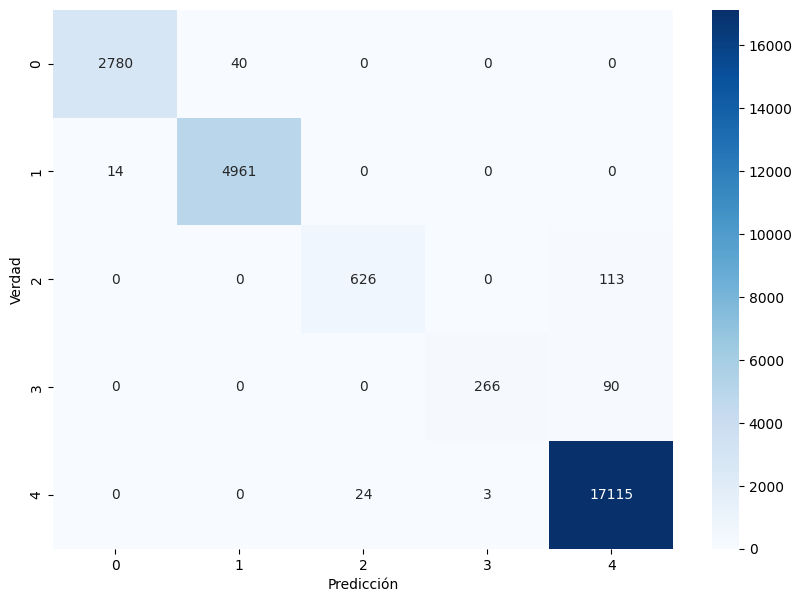

In [28]:
# Generar la matriz de confusión para todo el conjunto de datos
cm_all = confusion_matrix(y, y_pred_all)

# Crear un mapa de calor utilizando seaborn para todo el conjunto de datos
plt.figure(figsize=(10,7))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()


70% de los datos

In [29]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Preparar los datos
features = ['id_calificacion_pcl', 'id_calificacion_dto', 'numero_dictamen', 
            'id_empresa', 'soat', 'tipo', 'origen', 'porce_total', 
            'valor_2022_pa', 'dias_it_real_2022', 'suma_dias_it_h', 'cant_fac', 
            'valor_neto_cm_rad_', 'numero_de_siniestros_', 'estado_emp', 
            'usuario_activo', 'ultima_clasificacion_', 'platino', 
            'reservas_asistencial']

target = 'ruta_'
# Crear una copia del dataframe para no modificar el original
df_copy = df.copy()

# Rellenar los valores nulos en las columnas
for column in features:
    if df_copy[column].dtype == 'object':
        df_copy[column].fillna(df_copy[column].mode()[0], inplace=True)
    else:
        df_copy[column].fillna(df_copy[column].mean(), inplace=True)
# Codificar las variables categóricas
le = LabelEncoder()
for column in features:
    if df_copy[column].dtype == 'object':
        df_copy[column] = le.fit_transform(df_copy[column])
        # Separar los datos en características (X) y objetivo (y)
X = df_copy[features]
y = df_copy[target]

# Crear los conjuntos de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf.predict(X_test)

# Mostrar el informe de clasificación
print(classification_report(y_test, y_pred, zero_division=0))

                                                                                                 precision    recall  f1-score   support

                                      1, agudos sin pcl  sin incapacidad mayor o igual 15 dias        0.97      0.95      0.96       855
                                                          2. casos  en rehabilitacion integral        0.97      0.99      0.98      1490
5, casos con pcl definida, con incapacidad y prestaciones  asistenciales con rol laboral activo       0.71      0.31      0.43       238
         6, casos con pcl definida  con incapacidad y prestaciones  asistenciales desvinculados       0.75      0.07      0.12       134
                         7 cronicos con pcl definida  sin incapacidad y mantenimiento funcional       0.95      0.99      0.97      5093

                                                                                       accuracy                           0.95      7810
                                       

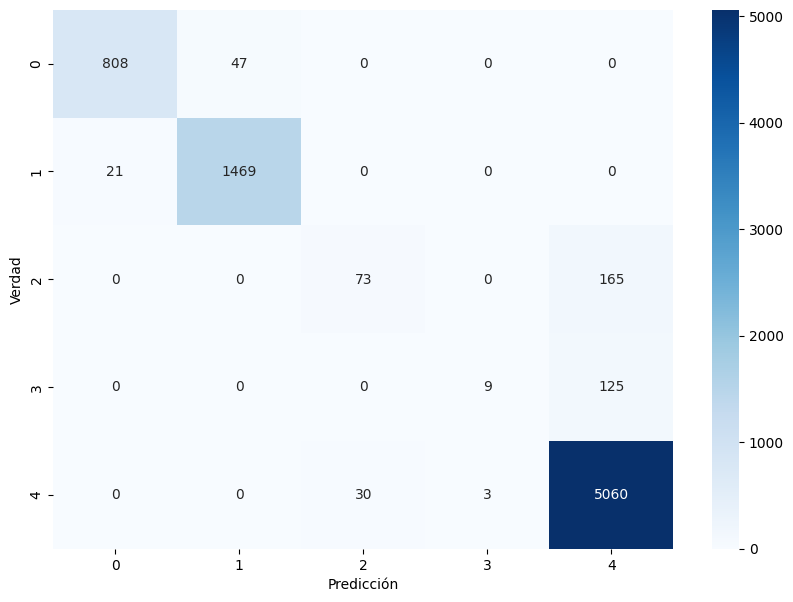

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = rf.predict(X_test)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

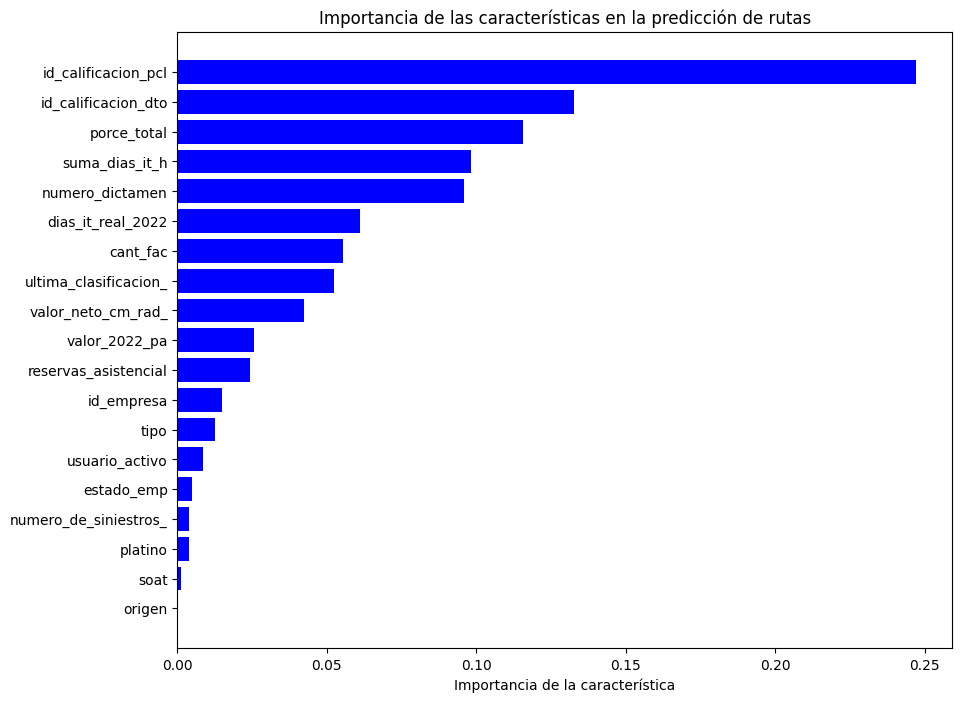

In [31]:
# Obteniendo importancia de las características
importances = rf.feature_importances_

# Creando un DataFrame para visualizar los resultados
feature_importances = pd.DataFrame({'feature': features, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Creando un gráfico de barras
plt.figure(figsize=(10,8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='blue', align='center')
plt.gca().invert_yaxis()  # Invertir el eje y para que la característica más importante esté en la parte superior
plt.xlabel('Importancia de la característica')
plt.title('Importancia de las características en la predicción de rutas')
plt.show()

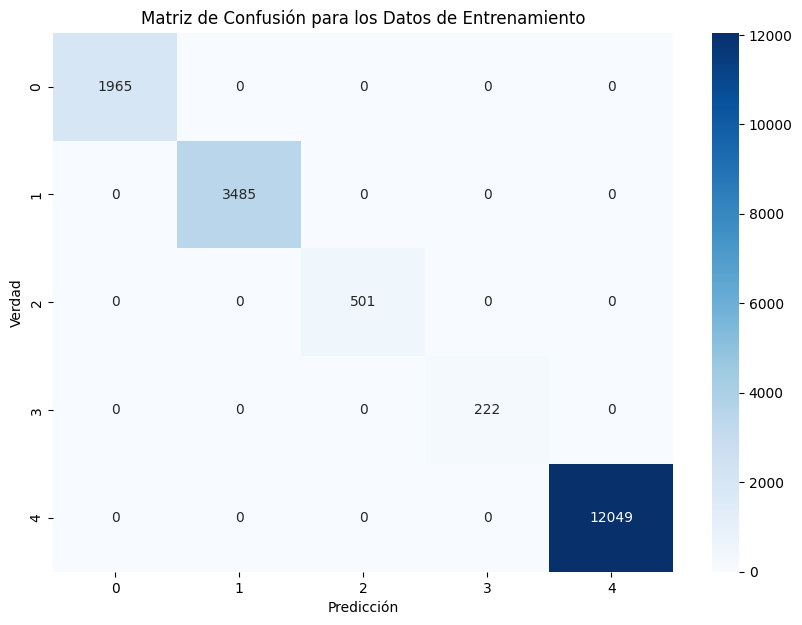

In [33]:
# Obtener las predicciones del modelo para los datos de entrenamiento
y_train_pred = rf.predict(X_train)

# Generar la matriz de confusión
cm_train = confusion_matrix(y_train, y_train_pred)

# Crear un mapa de calor utilizando seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.title('Matriz de Confusión para los Datos de Entrenamiento')
plt.show()


In [34]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [35]:
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print("Profundidades de los árboles: ", depths)
print("Profundidad media: ", sum(depths) / len(depths))


Profundidades de los árboles:  [24, 20, 22, 26, 21, 22, 23, 23, 22, 22, 27, 22, 28, 23, 20, 22, 20, 22, 25, 23, 26, 20, 23, 23, 23, 22, 24, 22, 22, 23, 20, 25, 25, 22, 23, 22, 26, 23, 24, 19, 21, 22, 22, 23, 26, 21, 21, 22, 26, 23, 23, 23, 23, 23, 21, 20, 21, 21, 22, 26, 25, 26, 24, 26, 22, 22, 23, 22, 19, 24, 21, 24, 23, 22, 22, 25, 24, 23, 20, 25, 29, 21, 29, 21, 21, 22, 22, 22, 21, 23, 21, 20, 23, 20, 21, 23, 23, 21, 21, 20]
Profundidad media:  22.7


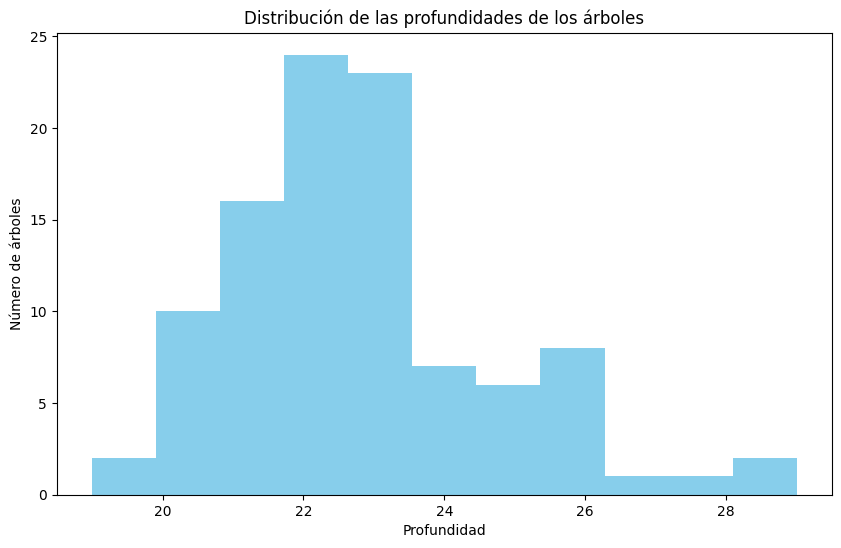

In [36]:
import matplotlib.pyplot as plt

depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

plt.figure(figsize=(10,6))
plt.hist(depths, bins='auto', color='skyblue')
plt.title('Distribución de las profundidades de los árboles')
plt.xlabel('Profundidad')
plt.ylabel('Número de árboles')
plt.show()


In [37]:
max_depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print("Profundidad máxima: ", max(max_depths))

Profundidad máxima:  29


In [ ]:
# Preparar los nuevos datos
features_new = ['id_calificacion_pcl', 'id_calificacion_dto', 'numero_dictamen', 
                'id_empresa', 'soat', 'tipo', 'origen', 'porce_total', 
                'valor_2022_pa', 'dias_it_real_2022', 'suma_dias_it_h', 'cant_fac', 
                'valor_neto_cm_rad_', 'numero_de_siniestros_', 'estado_emp', 
                'usuario_activo', 'ultima_clasificacion_', 'platino', 
                'reservas_asistencial']

df_new_copy = df_new.copy()

for column in features_new:
    if df_new_copy[column].dtype == 'object':
        df_new_copy[column].fillna(df_new_copy[column].mode()[0], inplace=True)
    else:
        df_new_copy[column].fillna(df_new_copy[column].mean(), inplace=True)

# Asegúrate de usar el mismo objeto LabelEncoder que utilizaste para el entrenamiento
# para codificar las variables categóricas.
# Aquí asumimos que 'le' es el LabelEncoder que usaste anteriormente.
for column in features_new:
    if df_new_copy[column].dtype == 'object':
        df_new_copy[column] = le.transform(df_new_copy[column])

X_new = df_new_copy[features_new]

# Realizar predicciones en los nuevos datos
y_new_pred = rf.predict(X_new)

# Ahora 'y_new_pred' contiene las predicciones de 'ruta_' para tus nuevos datos
print(y_new_pred)
